In [1]:
import json
import pandas as pd
import seaborn as sns

from scripts.analysis import *
from scripts.data_processing import process_trials_from_df

In [2]:
# set1 SAME players condition block trials: p2b_s11, p2a_s31, p2b_s02

with open('./trial_setups/p2b_s11.json', 'r') as f:
    bs11 = json.load(f)
    bs11 = pd.DataFrame.from_dict(bs11)
    bs11 = process_trials_from_df(bs11, 7)

with open('./trial_setups/p2b_s02.json', 'r') as f:
    bs02 = json.load(f)
    bs02 = pd.DataFrame.from_dict(bs02)
    bs02 = process_trials_from_df(bs02, 7)
    
with open('./trial_setups/p2a_s31.json', 'r') as f:
    as31 = json.load(f)
    as31 = pd.DataFrame.from_dict(as31)
    as31 = process_trials_from_df(as31, 7)

In [3]:
trials_tmp = pd.concat([bs11, bs02, as31])

In [4]:
trials_tmp['t_cond'] = trials_tmp['outcome'] * trials_tmp['n_red']

<AxesSubplot:xlabel='t_cond', ylabel='Count'>

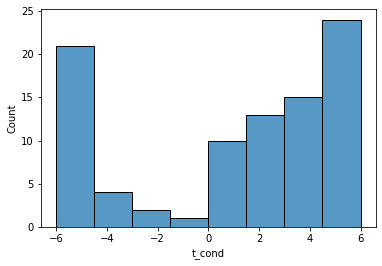

In [8]:
sns.histplot(x=trials_tmp['t_cond'])

In [10]:
from collections import Counter

Counter(trials_tmp['normed_signed_e_v'])

Counter({0.4545454545454545: 7,
         0.7272727272727272: 5,
         0.8181818181818181: 3,
         0.6363636363636362: 2,
         0.909090909090909: 3,
         1.0: 12,
         0.18181818181818185: 1,
         0.2727272727272727: 1,
         0.36363636363636365: 4,
         0.0: 6,
         0.09090909090909093: 1,
         0.12499999999999994: 2,
         0.875: 8,
         0.5: 2,
         0.75: 2,
         0.37500000000000006: 5,
         0.625: 2,
         0.22222222222222218: 4,
         0.5555555555555556: 6,
         0.6666666666666666: 4,
         0.4444444444444445: 3,
         0.8888888888888887: 4,
         0.7777777777777777: 1,
         0.11111111111111115: 2})

In [7]:
# load normalized reverse-coded honesty ratings, i.e. normalized suspicion ratings

with open('final_pilot_sameplayer_normalized_suspicion_ratings.json', 'r') as f:
    ratings = json.load(f)

In [8]:
uuids = ratings.keys()

In [5]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# Use a service account
cred = credentials.Certificate('E:/Behavioural cybersecurity/project-notes/cards-dd-game-61b9b7f26a6e.json')
firebase_admin.initialize_app(cred)

db = firestore.client()

subjects_ref = db.collection(u'subjects')

In [9]:
tmp = []

for uuid in uuids:
    tmp.append(subjects_ref.document(uuid).get())

In [10]:
condition = {}

for i, uuid in enumerate(uuids):
#     print(i)
    cond = tmp[i].to_dict()['condition']
    condition[uuid] = cond

In [8]:
# with open('same_conditions.json', 'w', encoding='utf-8') as f:
#     json.dump(condition, f)

In [11]:
condition.keys() == ratings.keys()

True

In [12]:
# # get saved uuid conditions

with open('same_conditions.json', 'r') as f:
    condition = json.load(f)

In [13]:
from skopt.space import Real

param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha')]

In [14]:
def same_cond_set1_single_model_fit(uuids, stat: str):
    results = []
    
    for i, uuid in enumerate(uuids):
        print(uuid)
        print("Subject", i)
    
        if condition[uuid] == "11":
            trials = pd.concat([bs11, as31, bs02]).reset_index()
        elif condition[uuid] == "12":
            trials = pd.concat([bs11, bs02, as31]).reset_index()
        elif condition[uuid] == "21":
            trials = pd.concat([as31, bs11, bs02]).reset_index()
        elif condition[uuid] == "22":
            trials = pd.concat([as31, bs02, bs11]).reset_index()
        elif condition[uuid] == "31":
            trials = pd.concat([bs02, bs11, as31]).reset_index()
        elif condition[uuid] == "32":
            trials = pd.concat([bs02, as31, bs11]).reset_index()
        else:
            print('no applicable subject condition found')
            continue

        hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
        result = skopt_fit_single_model_single_response(hrs, trials, param_search_space, stat)

    return results

In [15]:
n_reds = {}

for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)

    if condition[uuid] == "11":
        trials = pd.concat([bs11, as31, bs02]).reset_index()
    elif condition[uuid] == "12":
        trials = pd.concat([bs11, bs02, as31]).reset_index()
    elif condition[uuid] == "21":
        trials = pd.concat([as31, bs11, bs02]).reset_index()
    elif condition[uuid] == "22":
        trials = pd.concat([as31, bs02, bs11]).reset_index()
    elif condition[uuid] == "31":
        trials = pd.concat([bs02, bs11, as31]).reset_index()
    elif condition[uuid] == "32":
        trials = pd.concat([bs02, as31, bs11]).reset_index()
    else:
        print('no applicable subject condition found')
        continue
    n_red = [int(v) for v in trials['n_red'].values]
    n_reds[uuid] = n_red

54b9acd9fdf99b34ce2578f9
Subject 0
61017dbbf8b1afba48b7822e
Subject 1
6116aa4d3c4d9eae26b66171
Subject 2
6109b8238588407db4764ec1
Subject 3
611841738f4e8342f5ba3765
Subject 4
6108649840bf2b927ef3905c
Subject 5
5f4f8e8f9213e9056223e128
Subject 6
613290e8a4520dd8d0cc061a
Subject 7
61217de916b53da848302312
Subject 8
61338d61ed3f2e3d196fa7c7
Subject 9


In [17]:
# with open("same_n_red.json", "w", encoding='utf-8') as f:
#     json.dump(n_reds, f)

In [12]:
res_sig_colour_count = same_cond_set1_single_model_fit(uuids, 'normed_signed_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.16140162703195657, 'alpha =', 0.38962508200661056)
R2: 0.143916405483541
90 0.06077136627539486 2
BIC: -243.0576701916828
AIC: -248.05728953234333
61017dbbf8b1afba48b7822e
Subject 1


KeyboardInterrupt: 

In [14]:
res_usig_colour_count = same_cond_set1_single_model_fit(uuids, 'normed_unsigned_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.20162587489661407, 'alpha =', 0.3003885030951782)
R2: 0.06095851595529578
BIC: -234.7334236109546
AIC: -239.73304295161512
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.09764285663496058, 'alpha =', 0.46140011560732286)
R2: 0.17983861347590135
BIC: -266.80317052290775
AIC: -271.8027898635683
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.18938707823764142, 'alpha =', 0.1225035217325205)
R2: 0.05515551914174888
BIC: -386.52799302554126
AIC: -391.5276123662018
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.16758813563185937, 'alpha =', 0.5630672745236888)
R2: 0.2934707770150694
BIC: -288.3468372103381
AIC: -293.3464565509986
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.2794408532896178, 'alpha =', 0.5523988552801239)
R2: 0.13335961046308975
BIC: -202.53692759567681
AIC: -207.53654693633734
6108649840bf2b927ef3905c
S

In [15]:
res_cs_sig_ev = same_cond_set1_single_model_fit(uuids, 'normed_cs_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.1360309758066466, 'alpha =', 0.3705469011801431)
R2: 0.15014352931857278
BIC: -243.7147198099967
AIC: -248.71433915065722
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.13744059570166375, 'alpha =', 0.30421146558029033)
R2: 0.12498249482156298
BIC: -260.9763222715651
AIC: -265.97594161222565
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.17281627815921874, 'alpha =', 0.13198013109047635)
R2: 0.1023795032563175
BIC: -391.14256067378017
AIC: -396.1421800144407
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.32572586030601297, 'alpha =', 0.16795786877127292)
R2: 0.04110135032365203
BIC: -260.8589632615867
AIC: -265.8585826022472
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.33693672608942427, 'alpha =', 0.3475965761933071)
R2: 0.08465731351601369
BIC: -197.61623152449118
AIC: -202.6158508651517
6108649840bf2b927ef3905c


In [16]:
res_cs_usig_ev = same_cond_set1_single_model_fit(uuids, 'normed_cs_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.1674848866470452, 'alpha =', 0.3271945374234581)
R2: 0.12554678491957894
BIC: -241.14690130045048
AIC: -246.146520641111
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.18093390253035807, 'alpha =', 0.23367584892347013)
R2: 0.07892430136090911
BIC: -256.359472338233
AIC: -261.35909167889355
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.19026815756219012, 'alpha =', 0.10423893753027617)
R2: 0.0688228503928513
BIC: -387.8393655120975
AIC: -392.8389848527581
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.39739105437061106, 'alpha =', 0.033473329871965135)
R2: 0.0017094911711418304
BIC: -257.23565875107977
AIC: -262.2352780917403
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.3903764706078336, 'alpha =', 0.2599413837665171)
R2: 0.05133813446222102
BIC: -194.39837934204493
AIC: -199.39799868270546
6108649840bf2b927ef3905c

In [17]:
res_sig_ev = same_cond_set1_single_model_fit(uuids, 'normed_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0825415156205401, 'alpha =', 0.4262947427233231)
R2: 0.23872786279246339
BIC: -253.62161187747344
AIC: -258.62123121813397
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.05330138302907111, 'alpha =', 0.420135029765503)
R2: 0.2890087886867395
BIC: -279.65886637495566
AIC: -284.6584857156162
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.15824016809552627, 'alpha =', 0.14290525153251096)
R2: 0.14612595307481158
BIC: -395.6392912154736
AIC: -400.63891055613414
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.14276958996483863, 'alpha =', 0.46258444018425354)
R2: 0.3796740472230201
BIC: -300.05759168188615
AIC: -305.05721102254665
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.08205688753552881, 'alpha =', 0.74919772805387)
R2: 0.4774918744303773
BIC: -248.07544980190838
AIC: -253.0750691425689
6108649840bf2b927ef3905c
Sub

In [18]:
res_usig_ev = same_cond_set1_single_model_fit(uuids, 'normed_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.052761003620753436, 'alpha =', 0.4866735238360371)
R2: 0.2097660155291462
BIC: -250.26117515500496
AIC: -255.2607944956655
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.09878384489139601, 'alpha =', 0.34913617987212614)
R2: 0.13589448773863166
BIC: -262.10573317650596
AIC: -267.1053525171665
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.13303804216184067, 'alpha =', 0.19079466180998178)
R2: 0.184137011099213
BIC: -399.73764477457905
AIC: -404.73726411523955
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.12964895141009733, 'alpha =', 0.49506669102667705)
R2: 0.2989922671013322
BIC: -289.0529453586379
AIC: -294.0525646992984
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.17714209031477948, 'alpha =', 0.599860876204041)
R2: 0.20745122108670677
BIC: -210.58023304789498
AIC: -215.5798523885555
6108649840bf2b927ef3905c
S

## Weighted model fits, concatenated blocks

In [11]:
def objective_weighted(params, response, trials, stat1: str, stat2: str):
    pred = params[0] + params[1] * trials[stat1] + params[2] * trials[stat2]
    ss_res = np.sum((response-pred)**2)
    return ss_res

In [12]:
from scripts.analysis import skopt_fit_weighted_model_single_response

In [13]:
param_search_space = [Real(0, 1, name='prior'), Real(0, 1, name='alpha1'), Real(0, 1, name='alpha2'), Real(0, 1, name='weight')]

In [19]:
def same_cond_set1_weighted_model_fit(uuids, stat1: str, stat2: str):
    results = []
    
    for i, uuid in enumerate(uuids):
        print(uuid)
        print("Subject", i)
    
        if condition[uuid] == "11":
            trials = pd.concat([bs11, as31, bs02]).reset_index()
        elif condition[uuid] == "12":
            trials = pd.concat([bs11, bs02, as31]).reset_index()
        elif condition[uuid] == "21":
            trials = pd.concat([as31, bs11, bs02]).reset_index()
        elif condition[uuid] == "22":
            trials = pd.concat([as31, bs02, bs11]).reset_index()
        elif condition[uuid] == "31":
            trials = pd.concat([bs02, bs11, as31]).reset_index()
        elif condition[uuid] == "32":
            trials = pd.concat([bs02, as31, bs11]).reset_index()
        else:
            print('no applicable subject condition found')
            continue

        hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
        result = skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, stat1, stat2)
        results.append(result)

    return results

In [15]:
res_weighted_sigev_sigcolourt = same_cond_set1_weighted_model_fit(uuids, 'normed_signed_e_v', 'normed_signed_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = 0.061628962376643025 alpha 1 = 0.35018425643828177 alpha 2 = 0.15431141863649483
R2: 0.2534237700562699
BIC: -246.37637787665278
AIC: -256.37561655797384
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = 0.0 alpha 1 = 0.18298300074173351 alpha 2 = 0.44393041449412934
R2: 0.452240266246979
BIC: -294.133345830429
AIC: -304.13258451175005
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = 0.15202156558160473 alpha 1 = 0.11900915260538453 alpha 2 = 0.04969127271730117
R2: 0.1530723243844888
BIC: -387.3748274025681
AIC: -397.37406608388915
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = 0.09887114079349997 alpha 1 = 0.3288007537985824 alpha 2 = 0.28317860152282415
R2: 0.4436523176885707
BIC: -300.8546202529876
AIC: -310.8538589343087
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = 0.029949857058810984 alpha 1 = 0.5949598540236387 alpha 2 = 0.320

In [22]:
for i, uuid in enumerate(uuids):
    print(i, uuid)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_signed_e_v', 'normed_signed_colour_count')

0 54b9acd9fdf99b34ce2578f9
Best parameter estimates: prior = 0.0 alpha 1 = 0.1949884703430967 alpha 2 = 0.5816142456980485
R2: 0.4835676468845954
BIC: -279.54618567260707
AIC: -289.5454243539281
1 61017dbbf8b1afba48b7822e
Best parameter estimates: prior = 0.0 alpha 1 = 0.15442837002463378 alpha 2 = 0.5669020308796804
R2: 0.5514149365866021
BIC: -312.10980392005916
AIC: -322.1090426013802
2 6116aa4d3c4d9eae26b66171
Best parameter estimates: prior = 0.10130735138466575 alpha 1 = 0.17749003125207283 alpha 2 = 0.07223939492275858
R2: 0.24513091020832933
BIC: -397.731213704636
AIC: -407.73045238595705
3 6109b8238588407db4764ec1
Best parameter estimates: prior = 0.0005410204401049405 alpha 1 = 0.4377875909942277 alpha 2 = 0.34597060747158037
R2: 0.5397885349834799
BIC: -317.9282805204116
AIC: -327.92751920173265
4 611841738f4e8342f5ba3765
Best parameter estimates: prior = 0.0 alpha 1 = 0.5519040850252226 alpha 2 = 0.47089563035766707
R2: 0.5599941351047302
BIC: -254.54255356373858
AIC: -264.

## BLOCK 1 model fits

In [35]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_cs_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.1812126298691763, 'alpha =', 0.015944685220364498)
R2: 9.178227226158686e-05
BIC: -89.53726306444109
AIC: -95.14205259108971
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.13882100577463236, 'alpha =', 0.0)
R2: -1.45661479766801e-07
BIC: -89.99918041056418
AIC: -95.6039699372128
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.1445917346323646, 'alpha =', 0.6582737705023006)
R2: 0.14325168449306458
BIC: -101.29526077727209
AIC: -106.90005030392071
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.4094631814982762, 'alpha =', 0.3527803085271091)
R2: 0.03304292502855599
BIC: -91.00722001022565
AIC: -96.61200953687427
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.28335612958877854, 'alpha =', 1.0)
R2: 0.06525598009124545
BIC: -48.173462592340975
AIC: -53.7782521189896
6108649840bf2b927ef3905c
Subject 5
Best parameter estima

In [36]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_cs_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.127650057395296, 'alpha =', 1.0)
R2: 0.07388895211323776
BIC: -91.83734335196895
AIC: -97.44213287861757
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.08321285602909886, 'alpha =', 1.0)
R2: 0.05895378327603562
BIC: -91.82207556414798
AIC: -97.4268650907966
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.11357401356244558, 'alpha =', 0.763730649900824)
R2: 0.19548894404409356
BIC: -103.1825453461481
AIC: -108.78733487279672
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.38080429257825704, 'alpha =', 0.47185864871340466)
R2: 0.05974283079055942
BIC: -91.84724048405201
AIC: -97.45203001070062
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.2675545762096124, 'alpha =', 1.0)
R2: 0.09033174515152176
BIC: -48.9892447435523
AIC: -54.59403427020092
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: prior = (0.1719493

In [37]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0042882923714396845, 'alpha =', 0.35382263304473366)
R2: 0.17087781443872263
BIC: -95.15614183822707
AIC: -100.76093136487569
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0399907292234287, 'alpha =', 0.1955493567700578)
R2: 0.052468217554786145
BIC: -91.61602875371808
AIC: -97.2208182803667
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.03235809699138479, 'alpha =', 0.41545934180267985)
R2: 0.3673806464854804
BIC: -110.39351949530688
AIC: -115.99830902195549
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.24225302292963452, 'alpha =', 0.41592369936699475)
R2: 0.2956687771531584
BIC: -100.51438117205107
AIC: -106.11917069869969
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.013753539244711874, 'alpha =', 0.8093330862537319)
R2: 0.258935567283881
BIC: -55.13901682407771
AIC: -60.74380635072633
6108649840bf2b927ef3905c

In [38]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.38324033357587084)
R2: 0.49458862461371944
BIC: -110.00598676766042
AIC: -115.61077629430903
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.3076943324806904)
R2: 0.3988742964319094
BIC: -105.26772104938966
AIC: -110.87251057603828
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.02305722827036698, 'alpha =', 0.369877727132403)
R2: 0.29359451709710893
BIC: -107.08390428516081
AIC: -112.68869381180943
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.16289795578168806, 'alpha =', 0.48039263820949885)
R2: 0.3984591147181321
BIC: -105.24700798809405
AIC: -110.85179751474267
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.0, 'alpha =', 0.7793390656504631)
R2: 0.5332542928814263
BIC: -69.00810653183228
AIC: -74.6128960584809
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: prior = (0.0

In [39]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_unsigned_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.06431496358874371, 'alpha =', 0.5188964989599238)
R2: 0.08298029555220643
BIC: -92.13329904017885
AIC: -97.73808856682747
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.6503587082820895)
R2: 0.23317047498386445
BIC: -97.96390771113882
AIC: -103.56869723778743
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.18682068640630795, 'alpha =', 0.31522686857206583)
R2: 0.044364598631406515
BIC: -98.01829278597621
AIC: -103.62308231262483
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.23388552970256432, 'alpha =', 1.0)
R2: 0.3624414181483747
BIC: -103.50245817007611
AIC: -109.10724769672473
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.2226354222355434, 'alpha =', 1.0)
R2: 0.16044992217879528
BIC: -51.395660280558566
AIC: -57.00044980720719
6108649840bf2b927ef3905c
Subject 5


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (4.472314124966473e-05, 'alpha =', 0.9952622890614317)
R2: 0.19493396222134096
BIC: -80.13245981355641
AIC: -85.73724934020503
5f4f8e8f9213e9056223e128
Subject 6
Best parameter estimates: prior = (0.16241859276712103, 'alpha =', 0.855071500215191)
R2: 0.1365623986152863
BIC: -75.2025413694888
AIC: -80.80733089613742
613290e8a4520dd8d0cc061a
Subject 7
Best parameter estimates: prior = (0.26774151439323873, 'alpha =', 0.09783950829126266)
R2: 0.003985281745381819
BIC: -40.02433793997477
AIC: -45.629127466623395
61217de916b53da848302312
Subject 8
Best parameter estimates: prior = (0.2763341905552101, 'alpha =', 0.4761554676492026)
R2: 0.4612116330228795
BIC: -105.46753631008225
AIC: -111.07232583673087
61338d61ed3f2e3d196fa7c7
Subject 9
Best parameter estimates: prior = (0.18485975754356615, 'alpha =', 0.7441837994380579)
R2: 0.28023944622784047
BIC: -54.94754430577802
AIC: -60.55233383242664


In [40]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][:30]
    skopt_fit_single_model_single_response(hrs, trials[:30], param_search_space, 'normed_signed_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.7719533851621141)
R2: 0.6385719818353661
BIC: -120.06528078251104
AIC: -125.67007030915966
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.6537869844993138)
R2: 0.6163666262866729
BIC: -118.7412229329803
AIC: -124.34601245962892
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.13599745262973692, 'alpha =', 0.37806454566834025)
R2: 0.10460821289987798
BIC: -99.9717454123724
AIC: -105.57653493902102
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.23907611567440115, 'alpha =', 0.7035943158694486)
R2: 0.28194252910582074
BIC: -99.93535488122212
AIC: -105.54014440787074
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.12984731347757975, 'alpha =', 1.0)
R2: 0.4029171836334934
BIC: -61.61996934193112
AIC: -67.22475886857974
6108649840bf2b927ef3905c
Subject 5


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.9704768969995469)
R2: 0.6172379657682051
BIC: -102.4377848042805
AIC: -108.04257433092911
5f4f8e8f9213e9056223e128
Subject 6
Best parameter estimates: prior = (0.03543254867675581, 'alpha =', 1.0)
R2: 0.5007957133932516
BIC: -91.63972822648743
AIC: -97.24451775313605
613290e8a4520dd8d0cc061a
Subject 7
Best parameter estimates: prior = (0.20982518893974925, 'alpha =', 0.1899115989736749)
R2: 0.012209818381035631
BIC: -40.27308973278668
AIC: -45.8778792594353
61217de916b53da848302312
Subject 8
Best parameter estimates: prior = (0.2041254536285795, 'alpha =', 0.5332317053718638)
R2: 0.4576025036406114
BIC: -105.26724829798452
AIC: -110.87203782463314
61338d61ed3f2e3d196fa7c7
Subject 9
Best parameter estimates: prior = (0.03165915076367949, 'alpha =', 0.909312527093828)
R2: 0.3341305383926625
BIC: -57.28229264847122
AIC: -62.88708217511984


## BLOCK 2 model fits

In [41]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_cs_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.05546934141746201, 'alpha =', 0.42888970463542886)
R2: 0.06526927046958975
BIC: -100.84049128596328
AIC: -106.4452808126119
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.8392700164041367)
R2: 0.32607275159836724
BIC: -85.34804723930863
AIC: -90.95283676595724
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.17803196151764344, 'alpha =', 0.0)
R2: -3.738112912277103e-05
BIC: -177.21094941579554
AIC: -182.81573894244417
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.2777759731690488, 'alpha =', 0.0)
R2: -1.3189338510244397e-10
BIC: -97.4342696969694
AIC: -103.03905922361801
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.42224582473323474, 'alpha =', 0.0)
R2: -7.385164924045284e-09
BIC: -63.93088169624844
AIC: -69.53567122289707
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: prior = (0.361686

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.4973149632823595, 'alpha =', 0.0047891231466381376)
R2: -inf
BIC: -449.32908289112487
AIC: -454.9338724177735
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.07245890126855943, 'alpha =', 0.0)
R2: -2.8314348521352173e-06
BIC: -104.0816528728676
AIC: -109.68644239951621


In [42]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_cs_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.1218782952683426, 'alpha =', 0.5088567621131577)
R2: 0.09477110972954006
BIC: -101.80261135167277
AIC: -107.40740087832138
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.11773899577161494, 'alpha =', 0.749839168746524)
R2: 0.3710023663469667
BIC: -87.41788735172622
AIC: -93.02267687837484
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.000293246763783568, 'alpha =', 0.4602049905796117)
R2: 0.11333838976586375
BIC: -180.82082688773608
AIC: -186.4256164143847
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.0, 'alpha =', 0.7246598528003181)
R2: 0.05401382896634066
BIC: -99.10008955276905
AIC: -104.70487907941767
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.03622500993005684, 'alpha =', 1.0)
R2: 0.02230835054816016
BIC: -64.6077102833953
AIC: -70.21249981004392
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates:

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.497923259555321, 'alpha =', 0.002498949991645461)
R2: -inf
BIC: -475.61529537739875
AIC: -481.2200849040474
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.11252002912333037)
R2: 0.01576304064495959
BIC: -104.55839577282813
AIC: -110.16318529947675


In [43]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.025074273293343465, 'alpha =', 0.3978327472078457)
R2: 0.35664044363197744
BIC: -112.0471336182839
AIC: -117.65192314493251
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.23230199810945923, 'alpha =', 0.2504522700285447)
R2: 0.08942943110838897
BIC: -76.31957013585345
AIC: -81.92435966250207
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.13839383124321994, 'alpha =', 0.07654835868179873)
R2: 0.12981838416465463
BIC: -181.38367088728432
AIC: -186.98846041393296
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.23084537665465663, 'alpha =', 0.09398174793469626)
R2: 0.016767566219510144
BIC: -97.9415616998024
AIC: -103.54635122645102
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.27756135574844426, 'alpha =', 0.28654950276059815)
R2: 0.04626375723434695
BIC: -65.35192554325982
AIC: -70.95671506990844
6108649840bf2b927ef390

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.4999129316788012, 'alpha =', 0.0)
R2: -inf
BIC: -547.3242572550419
AIC: -552.9290467816904
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.16773818575007485)
R2: 0.16045127569917916
BIC: -109.32846075023288
AIC: -114.9332502768815


In [44]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.3911405380218981)
R2: 0.514655816042145
BIC: -120.50249731926284
AIC: -126.10728684591146
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.5179711233253276)
R2: 0.24251313502793292
BIC: -81.84152627232218
AIC: -87.4463157989708
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.1419457634260364, 'alpha =', 0.06795376681250546)
R2: 0.1471042625424358
BIC: -181.9856099099408
AIC: -187.59039943658942
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.053348562614785086, 'alpha =', 0.4253350252086449)
R2: 0.42213964897830825
BIC: -113.88696110283806
AIC: -119.49175062948667
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.06092713123821708, 'alpha =', 0.6849792493668447)
R2: 0.3649005529394559
BIC: -77.55009240202166
AIC: -83.15488192867028
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: 

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.5008055317577096, 'alpha =', 0.0)
R2: -inf
BIC: -413.8356862758573
AIC: -419.44047580250594
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.17585759444094343)
R2: 0.2629990723873201
BIC: -113.2367216606042
AIC: -118.84151118725282


In [45]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_signed_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.001905986061828294, 'alpha =', 0.7214628218716894)
R2: 0.39938286431631376
BIC: -114.10951564357865
AIC: -119.71430517022726
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.053931181321619025, 'alpha =', 0.6489783290456521)
R2: 0.43878016534591957
BIC: -90.83833146339359
AIC: -96.4431209900422
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.13401048608285934, 'alpha =', 0.1694978514542373)
R2: 0.3562349049821797
BIC: -190.42471218994152
AIC: -196.02950171659015
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.09102450142297272, 'alpha =', 0.7112110029497024)
R2: 0.44986647264768687
BIC: -115.36209729743568
AIC: -120.9668868240843
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.16551816730144278, 'alpha =', 0.9784049734503469)
R2: 0.27772962827434267
BIC: -73.69155394121314
AIC: -79.29634346786176
6108649840bf2b927ef3905c


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.5001144207330475, 'alpha =', 0.0)
R2: -inf
BIC: -530.9329062237676
AIC: -536.5376957504162
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.36638606530924606)
R2: 0.3542944388581143
BIC: -117.20408782004442
AIC: -122.80887734669304


In [46]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][30:60]
    skopt_fit_single_model_single_response(hrs, trials[30:60], param_search_space, 'normed_unsigned_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.10647178992349017, 'alpha =', 0.5703180269039403)
R2: 0.15033957917144203
BIC: -103.7031432834985
AIC: -109.30793281014712
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.16793810674744253, 'alpha =', 0.5205123587211302)
R2: 0.3556558248371975
BIC: -86.69472168534408
AIC: -92.2995112119927
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.10759726529380478, 'alpha =', 0.30467404718998753)
R2: 0.5249801331369284
BIC: -199.54403035412696
AIC: -205.1488198807756
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.06834968216541161, 'alpha =', 0.9083640598703882)
R2: 0.33074740089771304
BIC: -109.48208109046878
AIC: -115.0868706171174
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.3126401951096675, 'alpha =', 0.4750327637022488)
R2: 0.029705029767638225
BIC: -64.8355367384604
AIC: -70.44032626510902
6108649840bf2b927ef3905c
Subje

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at t

Best parameter estimates: prior = (0.0, 'alpha =', 0.0)
R2: nan
BIC: -inf
AIC: -inf
61217de916b53da848302312
Subject 8


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: invalid value encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:36: RuntimeWarning: divide by zero encountered in log
  bic = n * np.log(mse) + num_params * np.log(n)
C:\Users\Sarah Zheng\dev\simpy-suspicion-model\scripts\analysis.py:31: RuntimeWarning: divide by zero encountered in log
  aic = n * np.log(mse) + 2 * num_params


Best parameter estimates: prior = (0.49993922545777497, 'alpha =', 0.0)
R2: -inf
BIC: -568.8955846782251
AIC: -574.5003742048737
61338d61ed3f2e3d196fa7c7
Subject 9


<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.38591907369501005)
R2: 0.21153471028486903
BIC: -111.21174464182151
AIC: -116.81653416847013


## BLOCK 3 model fits

In [47]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_cs_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.7386021155221529)
R2: 0.44663298488856795
BIC: -84.01776188276766
AIC: -89.62255140941627
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.4279542310309199)
R2: 0.04166327496739586
BIC: -80.9733657683937
AIC: -86.57815529504232
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.09316756190234722, 'alpha =', 0.24251883996931328)
R2: 0.1507740920640458
BIC: -147.76100292901197
AIC: -153.3657924556606
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.16662777701185724, 'alpha =', 0.40707329303438045)
R2: 0.03216351785914007
BIC: -66.61629113105225
AIC: -72.22108065770087
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.0, 'alpha =', 0.8559379407819515)
R2: 0.24192667459346884
BIC: -71.07248690828038
AIC: -76.677276434929
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: prior = (0.0206689

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.22506573134873253, 'alpha =', 0.0228845299190792)
R2: 4.282604554017855e-05
BIC: -61.80025183382326
AIC: -67.40504136047188


In [48]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_cs_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.0, 'alpha =', 0.8472421373124198)
R2: 0.6499705403003503
BIC: -97.75788608281272
AIC: -103.36267560946133
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.4279423150874672)
R2: 0.06605962252496089
BIC: -81.74696386469687
AIC: -87.35175339134548
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.17921863804437163, 'alpha =', 0.15654522668718493)
R2: 0.1529973223697647
BIC: -147.83964439034827
AIC: -153.4444339169969
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.29642458017800805, 'alpha =', 0.28292806941586773)
R2: 0.03873153830273979
BIC: -66.82057382215798
AIC: -72.4253633488066
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.12642155673781397, 'alpha =', 0.7932339351384372)
R2: 0.27636167797585476
BIC: -72.46713902760403
AIC: -78.07192855425265
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates: 

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.03186852295851016, 'alpha =', 0.25096681850563934)
R2: 0.006488347429318253
BIC: -61.99425167247865
AIC: -67.59904119912727


In [56]:
condition

{'54b9acd9fdf99b34ce2578f9': '11',
 '61017dbbf8b1afba48b7822e': '12',
 '6116aa4d3c4d9eae26b66171': '21',
 '6109b8238588407db4764ec1': '21',
 '611841738f4e8342f5ba3765': '21',
 '6108649840bf2b927ef3905c': '11',
 '5f4f8e8f9213e9056223e128': '22',
 '613290e8a4520dd8d0cc061a': '31',
 '61217de916b53da848302312': '32',
 '61338d61ed3f2e3d196fa7c7': '31'}

In [49]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_unsigned_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.40237783415334827, 'alpha =', 0.2530567891797011)
R2: 0.0719721819439002
BIC: -68.50655446745077
AIC: -74.11134399409939
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.16943862721178166, 'alpha =', 0.34751495561518864)
R2: 0.14633124269217446
BIC: -84.44304448378338
AIC: -90.047834010432
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.265532137204923, 'alpha =', 0.03524583750094812)
R2: 0.019277442692830937
BIC: -143.4420719681433
AIC: -149.04686149479193
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.05238941021644599, 'alpha =', 0.6580444659233918)
R2: 0.47583183419920283
BIC: -85.01380882095711
AIC: -90.61859834760573
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.3867580198914247, 'alpha =', 0.44233031253917826)
R2: 0.19007939909092442
BIC: -69.08780381935459
AIC: -74.6925933460032
6108649840bf2b927ef3905c
Subject

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.541338871351743)
R2: 0.5619326836689016
BIC: -86.56044772978059
AIC: -92.16523725642921


In [50]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_signed_e_v')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.3047416812285669, 'alpha =', 0.3454450380503202)
R2: 0.07780251771703162
BIC: -68.69562403871062
AIC: -74.30041356535924
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.0, 'alpha =', 0.561877188357432)
R2: 0.3989456433395313
BIC: -94.96878065583836
AIC: -100.57357018248697
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.22460102333582688, 'alpha =', 0.08333307281204709)
R2: 0.06061959789946103
BIC: -144.73414473218955
AIC: -150.33893425883818
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.0, 'alpha =', 0.6573536301332937)
R2: 0.48974242188983574
BIC: -85.82071601886057
AIC: -91.42550554550918
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.040234005267121356, 'alpha =', 0.8290147843301136)
R2: 0.40130484471074224
BIC: -78.15331402270256
AIC: -83.75810354935118
6108649840bf2b927ef3905c
Subject 5
Best parameter estimates:

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.4561352466039952)
R2: 0.46951782421498434
BIC: -80.818034636639
AIC: -86.42282416328761


In [51]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_unsigned_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.43701249622000804, 'alpha =', 0.30284466864881265)
R2: 0.09363792824374073
BIC: -69.21523981088995
AIC: -74.82002933753857
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.22487847780011708, 'alpha =', 0.5528502582881866)
R2: 0.0794430571161504
BIC: -82.17997609267611
AIC: -87.78476561932473
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.260958188619435, 'alpha =', 0.06307723997720843)
R2: 0.05079631117067718
BIC: -144.42205774493584
AIC: -150.02684727158447
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.23710770309940168, 'alpha =', 0.5777190703487797)
R2: 0.33556561110998673
BIC: -77.90010154753743
AIC: -83.50489107418605
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.44519412170734507, 'alpha =', 0.5340729141446602)
R2: 0.26125422724374125
BIC: -71.8472750017415
AIC: -77.45206452839011
6108649840bf2b927ef3905c
Subje

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluate

Best parameter estimates: prior = (0.0, 'alpha =', 1.0)
R2: 0.17628806464916247
BIC: -67.61699912140661
AIC: -73.22178864805522


In [52]:
for i, uuid in enumerate(uuids):
    print(uuid)
    print("Subject", i)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
        
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()][60:]
    skopt_fit_single_model_single_response(hrs, trials[60:], param_search_space, 'normed_signed_colour_count')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.3783487253591216, 'alpha =', 0.3642471327080557)
R2: 0.10942646111523813
BIC: -69.74243530157557
AIC: -75.34722482822418
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.023647514575159484, 'alpha =', 1.0)
R2: 0.43248266926141676
BIC: -96.69120325096989
AIC: -102.29599277761851
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.24234261128574539, 'alpha =', 0.08769724125664902)
R2: 0.07929149025092708
BIC: -145.33645528070792
AIC: -150.94124480735655
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.12809562750794282, 'alpha =', 0.686662872444299)
R2: 0.3761092458793155
BIC: -79.78892723349676
AIC: -85.39371676014538
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.31171542263056906, 'alpha =', 0.6971727713006005)
R2: 0.35320184908280017
BIC: -75.83486233168152
AIC: -81.43965185833014
6108649840bf2b927ef3905c
Subject 5
Best par

<ipython-input-10-3c60888ec86d>:10: RuntimeWarning: divide by zero encountered in true_divide
  print("R2:", 1 - np.divide(optimal_ss_res, ss_tot))


Best parameter estimates: prior = (0.0, 'alpha =', 0.7931114079238782)
R2: 0.27922495856939955
BIC: -71.62181300975531
AIC: -77.22660253640393


<AxesSubplot:>

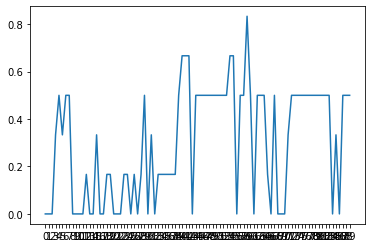

In [88]:
sns.lineplot(data=ratings['61017dbbf8b1afba48b7822e'])

<AxesSubplot:ylabel='normed_unsigned_colour_count'>

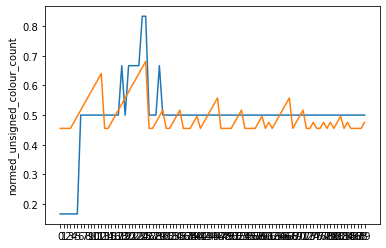

In [94]:
sns.lineplot(data=ratings['61217de916b53da848302312'])
tmp = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
sns.lineplot(data=0.414+tmp['normed_unsigned_colour_count']*0.267)

<AxesSubplot:ylabel='normed_unsigned_e_v'>

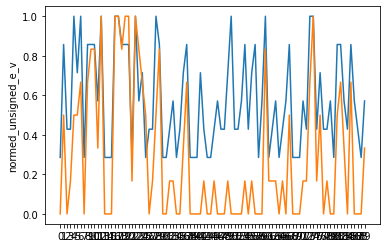

In [87]:
tmp = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
sns.lineplot(data=tmp['normed_unsigned_e_v'])
sns.lineplot(data=ratings['61338d61ed3f2e3d196fa7c7'])

<AxesSubplot:ylabel='normed_signed_e_v'>

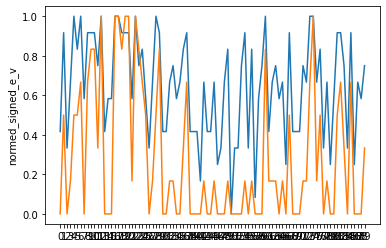

In [86]:
sns.lineplot(data=tmp['normed_signed_e_v'])
sns.lineplot(data=ratings['61338d61ed3f2e3d196fa7c7'])

In [71]:
condition

{'54b9acd9fdf99b34ce2578f9': '11',
 '61017dbbf8b1afba48b7822e': '12',
 '6116aa4d3c4d9eae26b66171': '21',
 '6109b8238588407db4764ec1': '21',
 '611841738f4e8342f5ba3765': '21',
 '6108649840bf2b927ef3905c': '11',
 '5f4f8e8f9213e9056223e128': '22',
 '613290e8a4520dd8d0cc061a': '31',
 '61217de916b53da848302312': '32',
 '61338d61ed3f2e3d196fa7c7': '31'}

In [63]:
tmp = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)

<AxesSubplot:ylabel='normed_unsigned_e_v'>

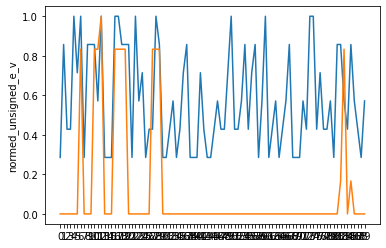

In [69]:
sns.lineplot(data=tmp['normed_unsigned_e_v'])
sns.lineplot(data=ratings['613290e8a4520dd8d0cc061a'])

In [54]:
condition['54b9acd9fdf99b34ce2578f9']

'11'

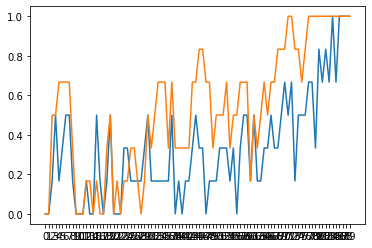

In [60]:
import seaborn as sns

# condition 11: 54b9acd9fdf99b34ce2578f9, 6108649840bf2b927ef3905c
sns.lineplot(data=ratings['54b9acd9fdf99b34ce2578f9'])
sns.lineplot(data=ratings['6108649840bf2b927ef3905c'])

tmp = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
# sns.lineplot(data=tmp['normed_cs_signed_e_v'])

In [34]:
for i, uuid in enumerate(uuids):
    print(i, uuid)
    
    if condition[uuid] == "11":
        trials = process_trials_from_df(pd.concat([bs11, as31, bs02]).reset_index(), 7)
    elif condition[uuid] == "12":
        trials = process_trials_from_df(pd.concat([bs11, bs02, as31]).reset_index(), 7)
    elif condition[uuid] == "21":
        trials = process_trials_from_df(pd.concat([as31, bs11, bs02]).reset_index(), 7)
    elif condition[uuid] == "22":
        trials = process_trials_from_df(pd.concat([as31, bs02, bs11]).reset_index(), 7)
    elif condition[uuid] == "31":
        trials = process_trials_from_df(pd.concat([bs02, bs11, as31]).reset_index(), 7)
    elif condition[uuid] == "32":
        trials = process_trials_from_df(pd.concat([bs02, as31, bs11]).reset_index(), 7)
    else:
        print('no applicable subject condition found')
        continue
    
    hrs = [ratings[uuid][key] for key in ratings[uuid].keys()]
    skopt_fit_weighted_model_single_response(hrs, trials, param_search_space, 'normed_cs_signed_e_v', 'normed_signed_colour_count')

0 54b9acd9fdf99b34ce2578f9
Best parameter estimates: prior = 0.009032935024823238 alpha 1 = 0.5337020609348078 alpha 2 = 0.3942955878635291
R2: 0.67379190048958
BIC: -320.89297663846895
AIC: -330.89221531979
1 61017dbbf8b1afba48b7822e
Best parameter estimates: prior = 0.0 alpha 1 = 0.19228278288766676 alpha 2 = 0.6205597338484741
R2: 0.6154159646720636
BIC: -325.96404419403575
AIC: -335.9632828753568
2 6116aa4d3c4d9eae26b66171
Best parameter estimates: prior = 0.1520964827756907 alpha 1 = 0.04695711568549979 alpha 2 = 0.18972175929010968
R2: 0.16851795646693324
BIC: -389.0313313119052
AIC: -399.03056999322627
3 6109b8238588407db4764ec1
Best parameter estimates: prior = 0.1589269346456702 alpha 1 = 0.0 alpha 2 = 0.682770488464422
R2: 0.4048801395122148
BIC: -294.7913738260986
AIC: -304.79061250741967
4 611841738f4e8342f5ba3765
Best parameter estimates: prior = 0.10995439605336062 alpha 1 = 0.1698484067873827 alpha 2 = 0.9038109012415828
R2: 0.4283242213096834
BIC: -230.98199769708154
AI

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.9875735342091176
R2: 0.558231086151303
BIC: -267.3704704602409
AIC: -277.36970914156194
7 613290e8a4520dd8d0cc061a
Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.34591588830872133
R2: 0.10661160665784042
BIC: -216.15582297454927
AIC: -226.15506165587033
8 61217de916b53da848302312
Best parameter estimates: prior = 0.23685084252465305 alpha 1 = 0.20837647004977689 alpha 2 = 0.3196053440837321
R2: 0.45407917811320353
BIC: -436.69822608179163
AIC: -446.6974647631127
9 61338d61ed3f2e3d196fa7c7
Best parameter estimates: prior = 0.0 alpha 1 = 0.0 alpha 2 = 0.825015569919401
R2: 0.4430520198756105
BIC: -229.96057487702217
AIC: -239.95981355834323


## Check responses

In [ ]:
tmp = [ratings['611be41c1e9cca41ae48582a'][key] for key in ratings['611be41c1e9cca41ae48582a'].keys()]

In [ ]:
trials = process_trials(pd.concat([bs11, as31, bs02]).reset_index(), 7)

In [ ]:
# sns.lineplot(data=[t*0.66+0.16 for t in trials.normed_cs_signed_e_v])
sns.lineplot(data=tmp)
sns.lineplot(data=trials.normed_unsigned_colour_count)

In [ ]:
del trials['level_0']
del trials['index']

In [ ]:
trials['trial'] = trials.index + 1

In [ ]:
trials['normed_suspicion_ratings'] = tmp

In [ ]:
df_subject = trials

In [ ]:
from matplotlib import ticker

sns.set(rc={'figure.figsize':(16,7)})
p = sns.lineplot(data=df_subject, x='trial', y='normed_suspicion_ratings')
p.set(ylim=(-0.25,1.2), xlim=(0, 91))
p.set_ylabel('actual normalized reversed honesty ratings')
p.set_title('Cards game progression')

markers2 = {"loss": "X", "win": "o", "tie": "D"}
colors = {-1: 'red', 1: 'blue'}

p2 = sns.lineplot(data=df_subject, x='trial', y='normed_unsigned_e_v')
# s = sns.scatterplot(data=df_subject, x='trial',y='subject_pick', c=[colors[x] for x in df_subject.random_pick_colour])
# s1 = sns.scatterplot(data=df_subject, x='trial',y='plot_subject_report', c=[colors[x] for x in df_subject.reported_pick_colour])
s2 = sns.scatterplot(data=df_subject, x='trial',y=1, c=[colors[x] for x in df_subject.outcome])

# s3 = sns.scatterplot(data=df_subject, x='trial',y='trial_result', markers=markers2, style=df_subject.trial_result)
s2.xaxis.set_major_locator(ticker.MultipleLocator(5))
# s4 = sns.scatterplot(data=df_subject, x='trial', y=[-0.2 if x else None for x in df_subject.lied])

In [ ]:
# df_subject['fit_suspicion'] = [t * 0.58 + 0.19 for t in df_subject.normed_cs_unsigned_e_v ]

In [ ]:
max(df_subject['normed_suspicion_ratings'] - df_subject['fit_suspicion'])

In [ ]:
max(trials.n_consec_colour)

In [ ]:
max(process_trials(as31, 7).n_consec_colour)

In [ ]:
min(process_trials(as31, 7).signed_n_consec_colour)

In [ ]:
max(process_trials(bs02, 7).n_consec_colour)

In [ ]:
min(process_trials(bs02, 7).signed_n_consec_colour)

In [ ]:
max(process_trials(bs11,7).n_consec_colour)

In [ ]:
min(process_trials(bs11, 7).signed_n_consec_colour)

In [ ]:
# sort by expectation violation level and plot honesty ratings

In [ ]:
sorted_trials = trials.sort_values('e_v')

In [ ]:
from scipy.stats import spearmanr

spearmanr(sorted_trials.normed_suspicion_ratings, sorted_trials.e_v)

In [ ]:
list(zip(sorted_trials.normed_suspicion_ratings, sorted_trials.e_v))

In [27]:
from collections import Counter
from statistics import variance

In [33]:
for uid in uuids:
    r = ratings[uid]
    r = [r[v] for v in r.keys()]
    print(variance(r))

0.07178526841210987
0.0575530586760799
0.013209182961466222
0.05258704396881953
0.1112359550544819
0.10398113469258982
0.09607435150371757
0.08392634206657927
0.011846303230850324
0.11548064918639202


In [28]:
ratings

{'54b9acd9fdf99b34ce2578f9': {'0': 0.0,
  '1': 0.0,
  '2': 0.1666666667,
  '3': 0.5,
  '4': 0.1666666667,
  '5': 0.3333333333,
  '6': 0.5,
  '7': 0.5,
  '8': 0.1666666667,
  '9': 0.0,
  '10': 0.0,
  '11': 0.0,
  '12': 0.1666666667,
  '13': 0.0,
  '14': 0.0,
  '15': 0.5,
  '16': 0.1666666667,
  '17': 0.0,
  '18': 0.1666666667,
  '19': 0.5,
  '20': 0.0,
  '21': 0.0,
  '22': 0.0,
  '23': 0.3333333333,
  '24': 0.3333333333,
  '25': 0.1666666667,
  '26': 0.1666666667,
  '27': 0.1666666667,
  '28': 0.1666666667,
  '29': 0.3333333333,
  '30': 0.5,
  '31': 0.1666666667,
  '32': 0.1666666667,
  '33': 0.1666666667,
  '34': 0.1666666667,
  '35': 0.1666666667,
  '36': 0.1666666667,
  '37': 0.5,
  '38': 0.0,
  '39': 0.1666666667,
  '40': 0.0,
  '41': 0.1666666667,
  '42': 0.1666666667,
  '43': 0.3333333333,
  '44': 0.5,
  '45': 0.3333333333,
  '46': 0.3333333333,
  '47': 0.0,
  '48': 0.1666666667,
  '49': 0.1666666667,
  '50': 0.1666666667,
  '51': 0.3333333333,
  '52': 0.3333333333,
  '53': 0.3333

## Check response fit with optimal signed lie probability detector

In [27]:
import csv

with open("bs02_lie_prob.csv", encoding="utf-8") as f:
    file = csv.reader(f)
    bs02_lie_prob = []
    for row in file:
        bs02_lie_prob.append(row)
        
rP = [float(v) for v in bs02_lie_prob[0]]

rP = [max(rP)-v for v in rP]

In [32]:
bs02['lie_prob'] = rP

In [39]:
with open("bs11_lie_prob.csv", encoding="utf-8") as f:
    file = csv.reader(f)
    bs11_lie_prob = []
    for row in file:
        bs11_lie_prob.append(row)
        
rP = [float(v) for v in bs11_lie_prob[0]]

rP = [max(rP)-v for v in rP]

In [40]:
bs11['lie_prob'] = rP

In [42]:
with open("as31_lie_prob.csv", encoding="utf-8") as f:
    file = csv.reader(f)
    as31_lie_prob = []
    for row in file:
        as31_lie_prob.append(row)
        
rP = [float(v) for v in as31_lie_prob[0]]

rP = [max(rP)-v for v in rP]

In [43]:
as31['lie_prob'] = rP

In [44]:
res_sig_lie_prob = same_cond_set1_single_model_fit(uuids, 'lie_prob')

54b9acd9fdf99b34ce2578f9
Subject 0
Best parameter estimates: prior = (0.14961502171126673, 'alpha =', 0.4042910032089279)
R2: 0.3149629616866122
90 0.04862917247125707 2
BIC: -263.1182310986055
AIC: -268.117850439266
61017dbbf8b1afba48b7822e
Subject 1
Best parameter estimates: prior = (0.10097195673156138, 'alpha =', 0.4385099192851473)
R2: 0.46329916178880326
90 0.03054556622381393 2
BIC: -304.96859687118945
AIC: -309.96821621184995
6116aa4d3c4d9eae26b66171
Subject 2
Best parameter estimates: prior = (0.1825269860677923, 'alpha =', 0.13281974813503153)
R2: 0.18574182858890886
90 0.01063617755110427 2
BIC: -399.91485076914023
AIC: -404.91447010980073
6109b8238588407db4764ec1
Subject 3
Best parameter estimates: prior = (0.2471855685426481, 'alpha =', 0.36952671339785864)
R2: 0.35994798069496714
90 0.033284460973952996 2
BIC: -297.2401972084716
AIC: -302.2398165491321
611841738f4e8342f5ba3765
Subject 4
Best parameter estimates: prior = (0.2259749398356939, 'alpha =', 0.6529032466544729)


In [58]:
from matplotlib import pyplot as plt

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

[Text(0.5, 0, 'trial')]

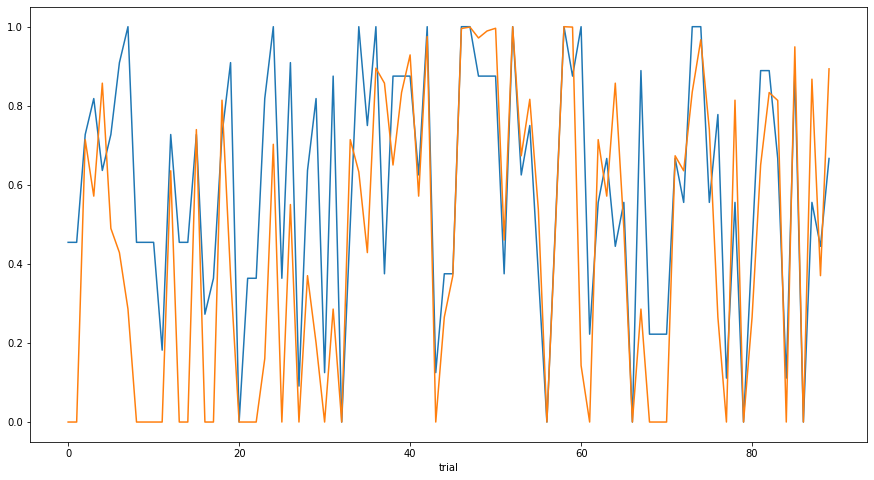

In [62]:
plt.figure(figsize=(15,8))

p = sns.lineplot(data=trials_tmp['normed_signed_e_v'].values)
p2 = sns.lineplot(data=trials_tmp['lie_prob'].values)

p.set(xlabel="trial")